In [1]:
import NNMFit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar


In [3]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})

In [4]:
plotting_path = "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/extraSPL"
data_path = "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/extraSPL"
data_benchmark_path = "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override"

In [5]:
scan_dir_dict = {
                 ### Fitting an extra SPL, but excluding the astro component from the he datasets (I think wrong!!)
                 "SPL_he" : f"{data_path}/track_cscd_he_nominal_emptyICC_SPL_extraSPL", # with he event
                 "BPL_he" : f"{data_path}/track_cscd_he_nominal_emptyICC_BPL_extraSPL",

                 ### not fitting extra component
                 "SPL_he_bench" : f"{data_benchmark_path}/track_cscd_he_nominal_emptyICC_SPL", # with he event
                 "BPL_he_bench" : f"{data_benchmark_path}/track_cscd_he_nominal_emptyICC_BPL",

                 ###
                 "SPL_10_100PeV" : f"{data_path}/track_cscd_he_nominal_emptyICC_SPL_extraSPL_10_100PeV", # with he event
                 "BPL_10_100PeV" : f"{data_path}/track_cscd_he_nominal_emptyICC_BPL_extraSPL_10_100PeV", # with he event

                 "SPL_10_100PeV_bench" : f"{data_path}/track_cscd_he_nominal_emptyICC_SPL_10_100PeV", # with he event
                 "BPL_10_100PeV_bench" : f"{data_path}/track_cscd_he_nominal_emptyICC_BPL_10_100PeV", # with he event

                 }

In [6]:
drop_unsuccessful = True

scan_dict = {}

bestfits = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)

    bestfits[name] = scan_dict[name].get_freefit(drop_unsuccessful="True")



SPL_he


BPL_he
SPL_he_bench
BPL_he_bench
SPL_10_100PeV
BPL_10_100PeV
SPL_10_100PeV_bench
BPL_10_100PeV_bench


In [10]:
def compare_fits( name1, name2, parameter, bins = 20, bin_low = -6, bin_high = -5.0 ):

    binning = np.linspace(bin_low,bin_high,bins+1)

    bestfit1 = bestfits[name1][parameter]
    bestfit2 = bestfits[name2][parameter]

    fig, (ax) = plt.subplots(1, 1)

    ax.hist( scan_dict[name1].get_raw_df().loc["freefit"][parameter], bins = binning, color = "blue", label = name1, alpha = 0.3 )
    ax.hist( scan_dict[name2].get_raw_df().loc["freefit"][parameter], bins = binning, color = "red", label = name2, alpha = 0.3 )
    
    ax.axvline(bestfit1, color="blue", linestyle="--", label=f"Bestfit {bestfit1:.3f},")
    ax.axvline(bestfit2, color="red", linestyle="--", label=f"Bestfit {bestfit2:.3f}")

    ax.set_title(f"Comparing {name1} and {name2}")

    ax.set_xlabel(parameter)
    ax.set_ylabel("Number of hits")

    ax.legend()
    plt.savefig(f"{plotting_path}/compare_fits_{name1}-{name1}_parameter-{parameter}.pdf")

## normal parameters
# compare_fits("SPL_he", "SPL_he_bench", "astro_norm", bins = 20, bin_low = 1.75, bin_high = 1.85)
# compare_fits("SPL_he", "SPL_he_bench", "gamma_astro", bins = 20, bin_low = 2.50, bin_high = 2.54)

# compare_fits("BPL_he", "BPL_he_bench", "astro_norm", bins = 20, bin_low = 1.75, bin_high = 1.85)
# compare_fits("BPL_he", "BPL_he_bench", "e_break", bins = 20, bin_low = 4, bin_high = 5)
# compare_fits("BPL_he", "BPL_he_bench", "gamma_1", bins = 20, bin_low = 1.2, bin_high = 1.4)
# compare_fits("BPL_he", "BPL_he_bench", "gamma_2", bins = 20, bin_low = 2.6, bin_high = 2.9)

### bump parameters
# compare_fits("SPL_he", "BPL_he", "astro_he_norm", bins = 20, bin_low = 0, bin_high = 2)



In [12]:
def obtain_fitlist( name, parameters ):

    result =  f'{scan_dict[name].get_raw_df().loc["freefit"][parameters]}\n'

    result+=20*"-" + "\n"

    result+= f"{bestfits[name][parameters]}"
    return result

# print( obtain_fitlist( "SPL_he", ["astro_norm", "gamma_astro", "astro_he_norm", "llh"] ) )
print( obtain_fitlist( "BPL_he", ["astro_norm", "e_break", "gamma_1", "astro_he_norm", "llh"] ) )

# print( obtain_fitlist( "SPL_he_bench", ["astro_norm", "gamma_astro", "llh"] ) )
print( obtain_fitlist( "BPL_he_bench", ["astro_norm", "e_break", "gamma_1", "gamma_2", "llh"] ) )



   astro_norm   e_break   gamma_1  astro_he_norm          llh
0    1.767092  4.389828  1.314153       0.031183   3594.23969
1    1.764378  4.390599  1.312502       0.031181  3594.239867
2    1.764511  4.390592  1.312739       0.031182  3594.239869
3    1.764367  4.390594  1.312465       0.031183  3594.239867
4     1.76708  4.389813  1.314081       0.031183   3594.23969
5    1.767114  4.389861  1.314308       0.031183   3594.23969
6    1.767114  4.389861  1.314309       0.031183   3594.23969
7    1.767046  4.389861  1.314242       0.031183   3594.23969
8    1.767127  4.389841  1.314225       0.031183   3594.23969
9    1.767109  4.389853  1.314269       0.031183   3594.23969
--------------------
astro_norm         1.767114
e_break            4.389861
gamma_1            1.314308
astro_he_norm      0.031183
llh              3594.23969
Name: 5, dtype: Float64
   astro_norm   e_break   gamma_1   gamma_2          llh
0    1.776386   4.36924  1.280601  2.699419  3597.906946
1    1.776218  4.36

In [29]:

root_1_sigma = 1.0

def find_errors( name ):

    print(5*"-", name)

    parameters = scan_dict[name].get_scan_list()

    for parameter in parameters:

        if parameter == "freefit": continue

        print(parameter)

        # best fit
        print("bestfit", bestfits[name][parameter])

        scan = scan_dict[name].get_scan_df( param_name = parameter, drop_unsuccessful = drop_unsuccessful)

        interpolator_dllh = interp1d(scan[parameter], scan["dllh"], kind='linear', fill_value="extrapolate")

        # Define a function to find the points where dllh = 0.5
        def find_root(value):
            return lambda x: interpolator_dllh(x) - value

        # Solve for points where dllh = 0.5
        roots = []
        for initial_guess in np.linspace(scan[parameter].min(), scan[parameter].max(), 100):
            # print(initial_guess, interpolator_dllh(initial_guess))
            try:
                sol = root_scalar(find_root(root_1_sigma), bracket=[initial_guess, initial_guess + 0.1], method='bisect')
                if sol.converged:
                    roots.append(sol.root)
            except ValueError:
                continue  # Skip intervals where there are no solutions

        # print(roots)

        # Remove duplicate roots that are very close to each other
        threshold = 1e-2  # Define a distance threshold
        unique_roots = []
        for root in roots:
            if not unique_roots or all(abs(root - ur) > threshold for ur in unique_roots):
                unique_roots.append(root)
            
        print(unique_roots)

        print(f"abs diff {abs(unique_roots-bestfits[name][parameter])}")


for name in scan_dir_dict:
    if "2D" in name: continue
    find_errors(name)


----- SPL_he
astro_he_norm
bestfit 0.031183070181137137
[]
abs diff []
astro_norm
bestfit 1.7995635788422135
[1.6375904992777968, 1.9296701510354375]
abs diff [0.16197308 0.13010657]
gamma_astro
bestfit 2.520142616441563
[2.493439334203742, 2.5434601201138296]
abs diff [0.02670328 0.0233175 ]
----- BPL_he
astro_he_norm
bestfit 0.03118308523595741
[]
abs diff []
astro_norm
bestfit 1.7671140203670284
[1.5883352717412185, 1.9340042016065464]
abs diff [0.17877875 0.16689018]
e_break
bestfit 4.389860910661188
[4.294898439897651, 4.4884385180461885]
abs diff [0.09496247 0.09857761]
gamma_1
bestfit 1.3143079585613417
[0.0638434460919234, 1.7859868978463016]
abs diff [1.25046451 0.47167894]
gamma_2
bestfit 2.7352202108420243
[2.6615385799421643, 2.798935357211002]
abs diff [0.07368163 0.06371515]
----- SPL_he_bench
astro_norm
bestfit 1.8124010588565764
[1.6508123623846174, 1.9436795638409836]
abs diff [0.1615887 0.1312785]
gamma_astro
bestfit 2.5115708647248876
[2.482643213815681, 2.5374395210

In [9]:
def plot_dllh( name, parameter ):

    scan = scan_dict[name].get_scan_df( param_name = parameter, drop_unsuccessful = drop_unsuccessful)

    bestfit = bestfits[name][parameter]

    fig, (ax) = plt.subplots(1, 1)

    ax.plot( scan[parameter], scan["dllh"] )
    ax.axhline(1.0, color="red", linestyle="--", label="dllh = 1.0")
    ax.axvline(bestfit, color="green", linestyle="--", label=f"Bestfit {bestfit:.2f}")

    ax.set_xlabel(parameter)
    ax.set_ylabel("dllh")

    ax.set_title(name)

    # ax.set_ylim( [ min(scan["dllh"]) - 1, min(scan["dllh"]) +5])
    ax.set_ylim( [ -1,5 ])

    ax.legend()

    plt.savefig(f"{plotting_path}/dllh_name-{name}_parameter-{parameter}.pdf")



/tmp/ipykernel_21350/270181242.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax) = plt.subplots(1, 1)


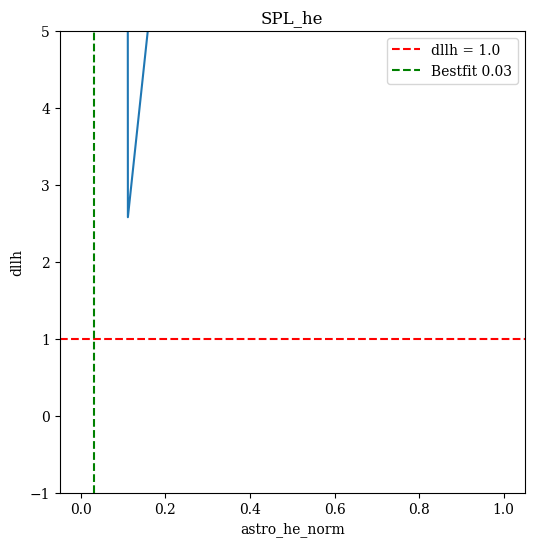

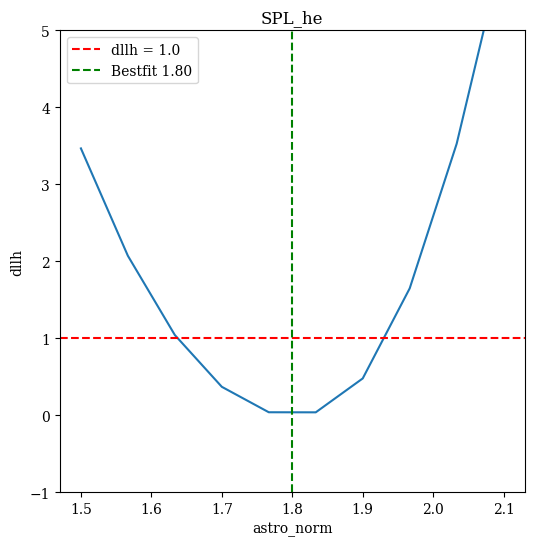

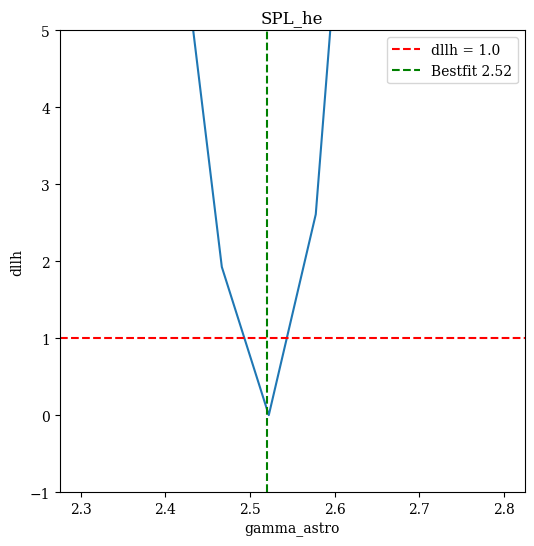

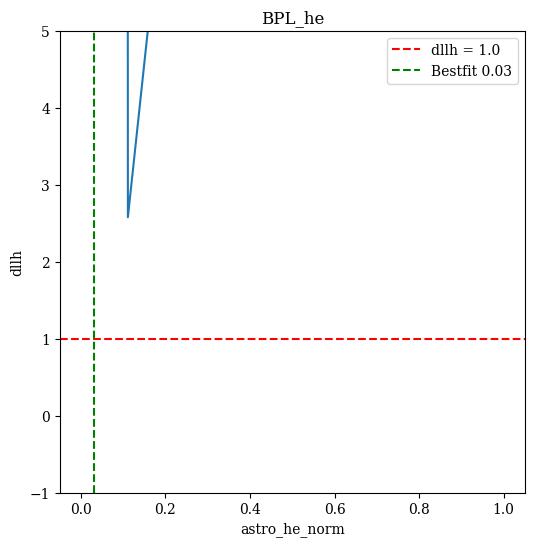

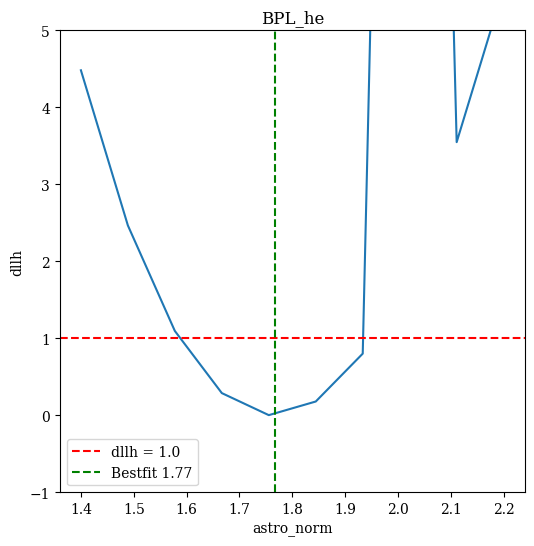

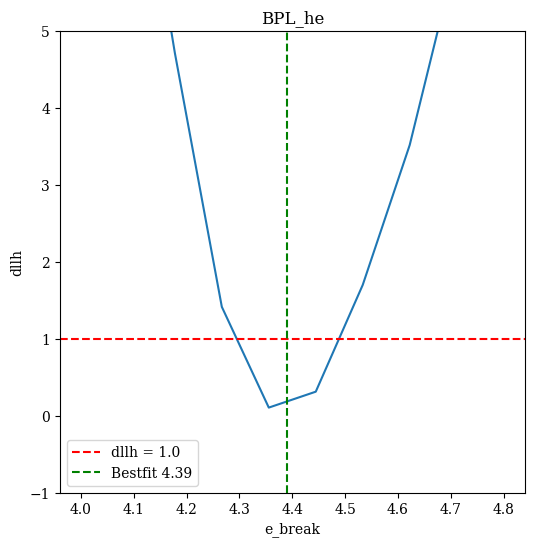

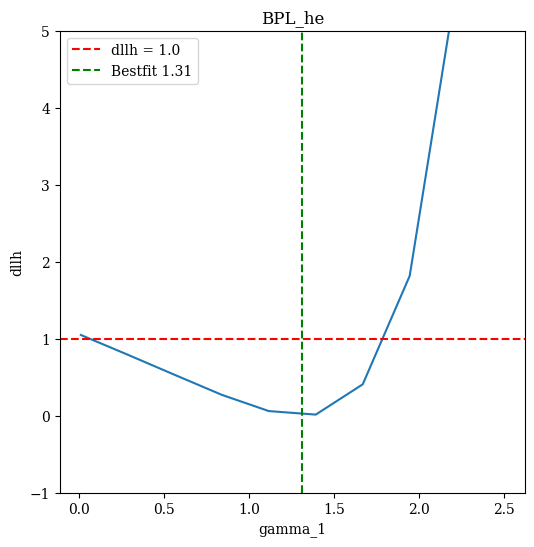

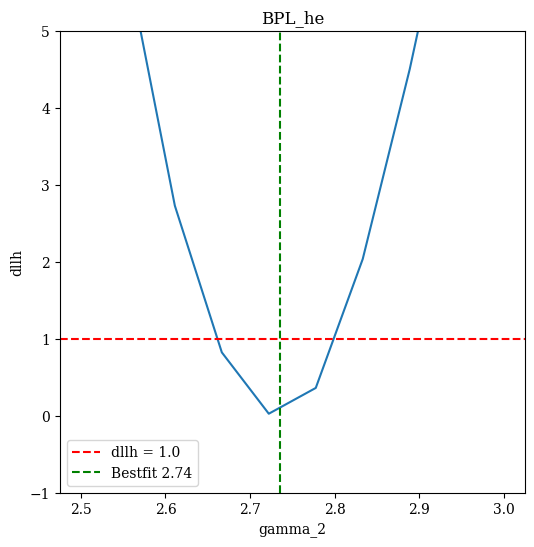

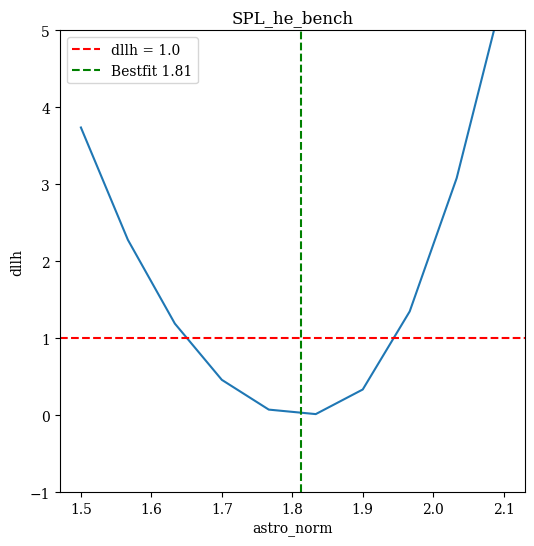

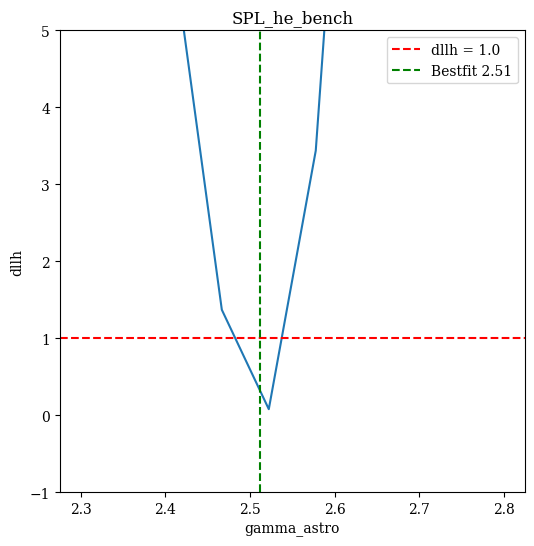

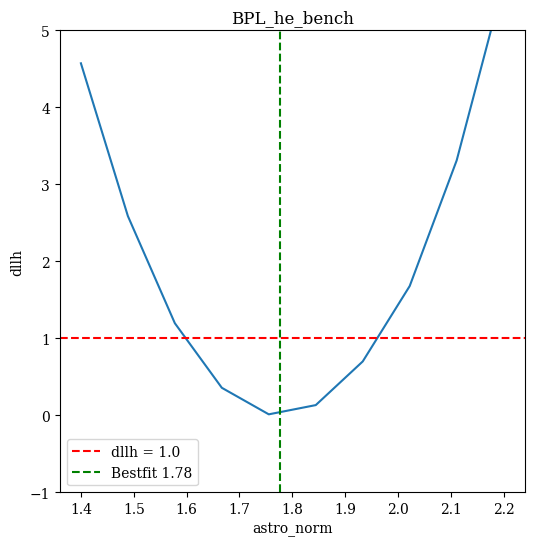

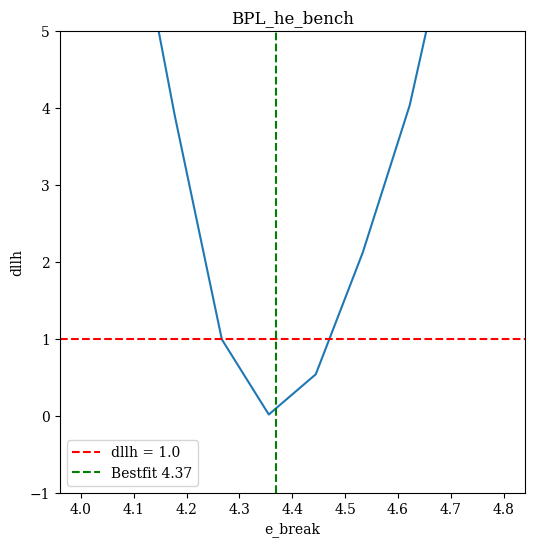

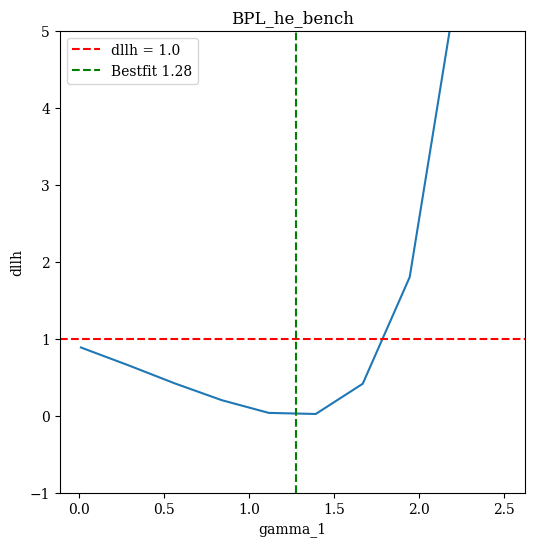

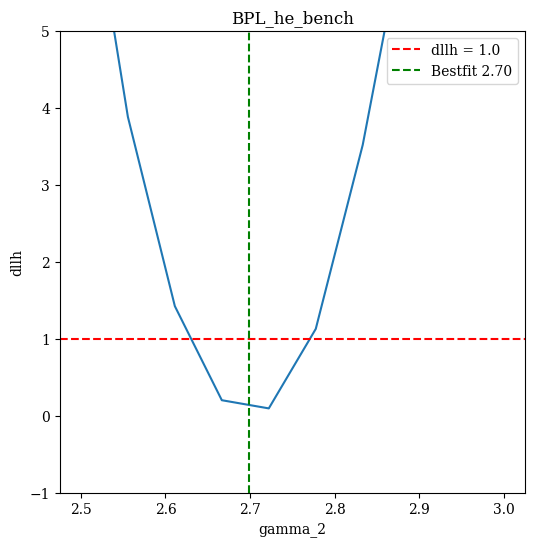

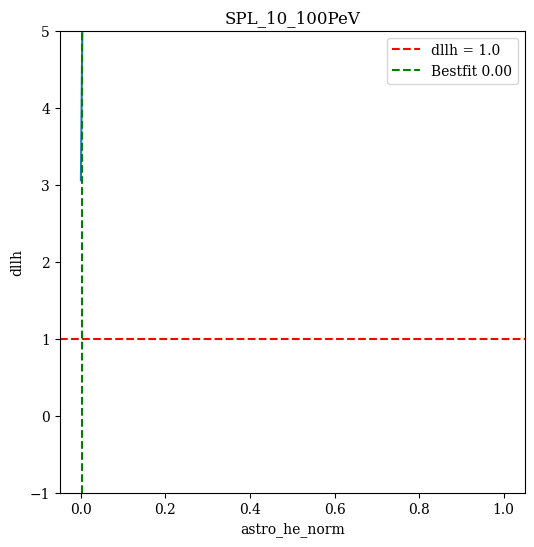

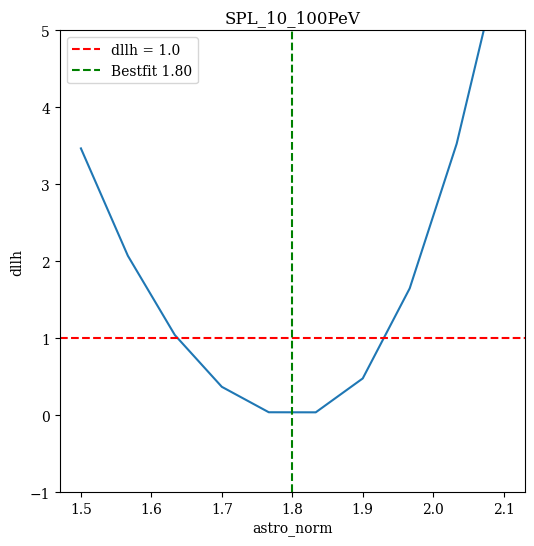

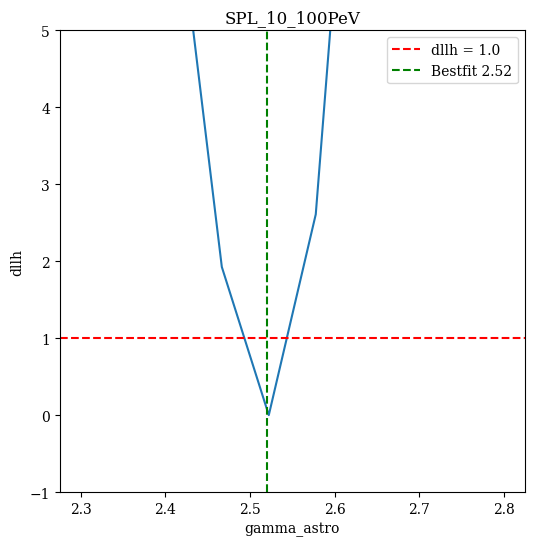

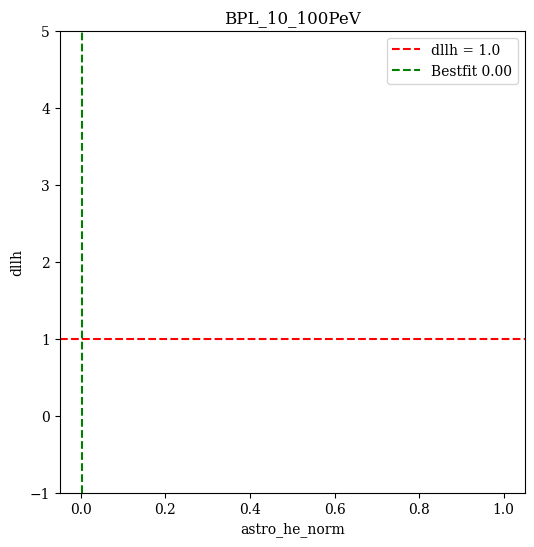

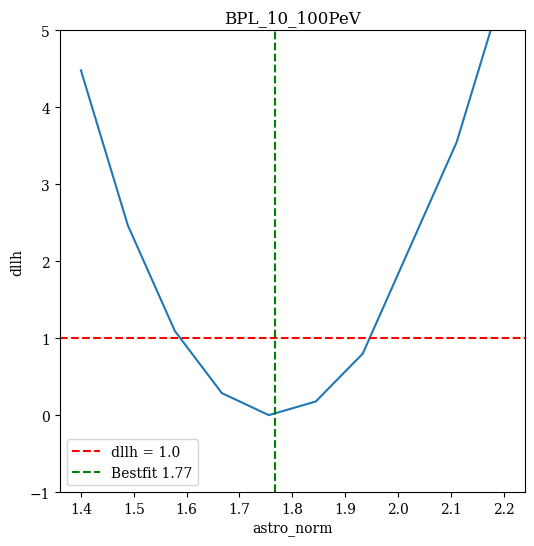

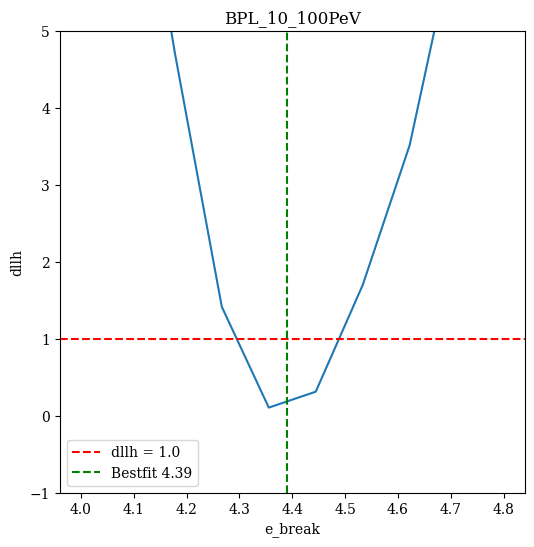

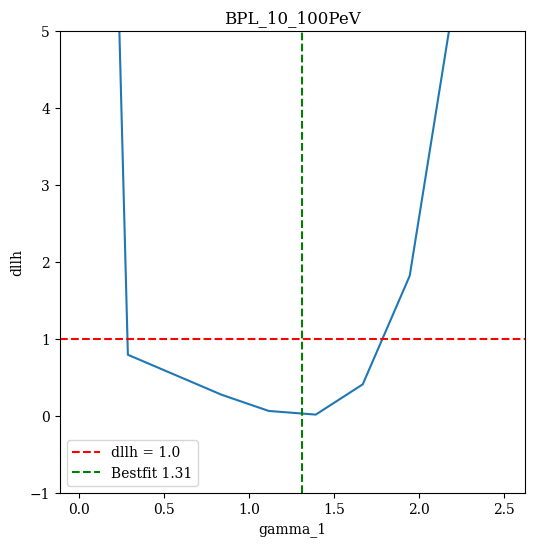

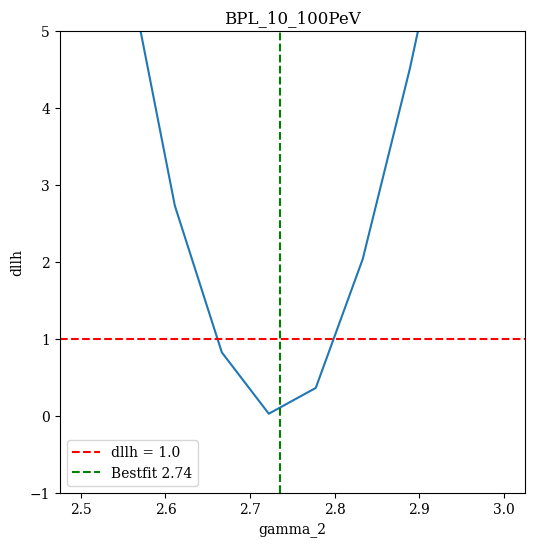

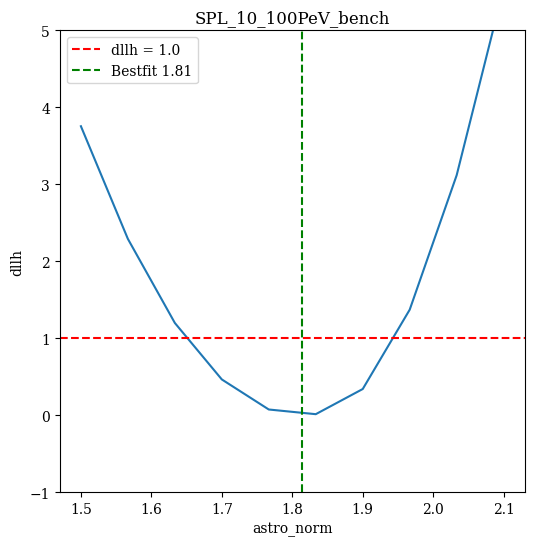

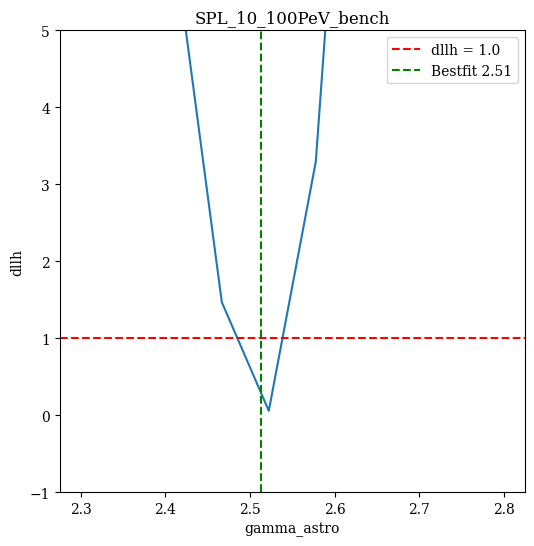

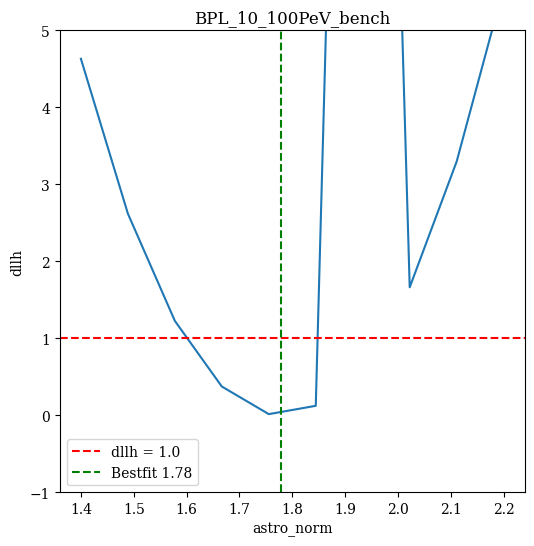

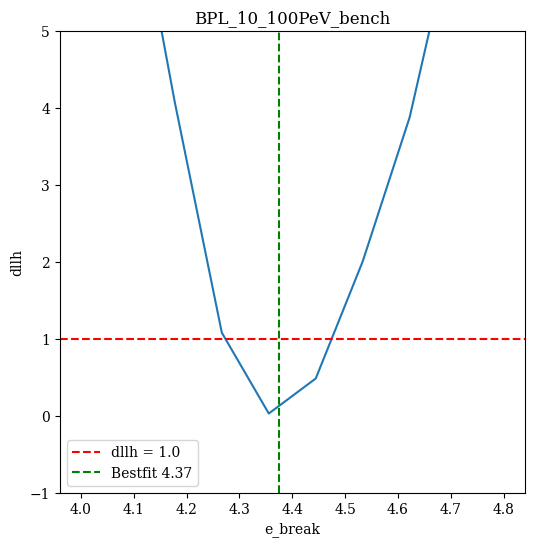

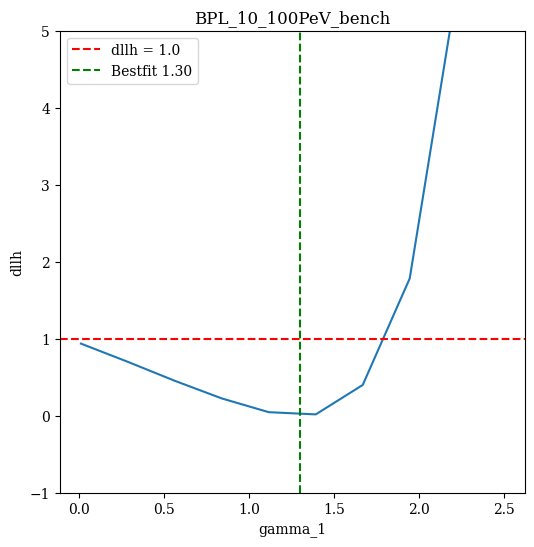

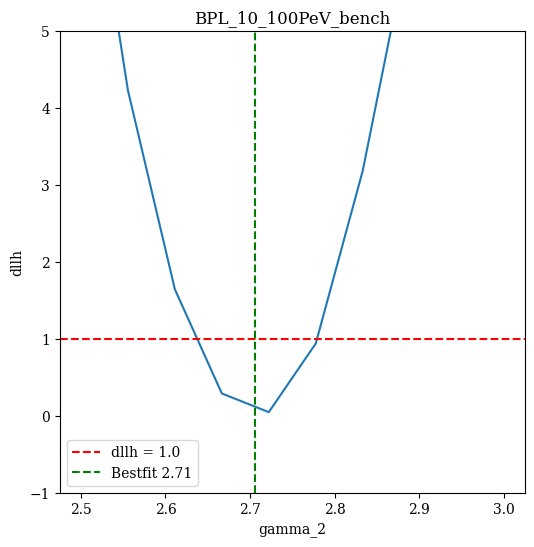

In [13]:
for name in scan_dir_dict:
    if "2D" in name: continue
    parameters = scan_dict[name].get_scan_list()
    for parameter in parameters:
        if parameter == "freefit": continue
        plot_dllh( name, parameter )


In [31]:
import scipy.stats as stats


def calculate_sigma(chi2_value, degrees_of_freedom = 3):

    # Calculate the p-value from the chi-squared survival function
    p_value = stats.chi2.sf(chi2_value, degrees_of_freedom)

    # Convert p-value to sigma (number of standard deviations)
    sigma_significance = stats.norm.isf(p_value)

    return sigma_significance

In [32]:
# compare chi2
degrees_of_freedom = 1
print(10*"-", "Old binning")
print("SPL",-2*(bestfits["SPL_he"].llh-bestfits["SPL_he_bench"].llh), calculate_sigma( -2*(bestfits["SPL_he"].llh-bestfits["SPL_he_bench"].llh), degrees_of_freedom=degrees_of_freedom ) )
print("BPL",-2*(bestfits["BPL_he"].llh-bestfits["BPL_he_bench"].llh), calculate_sigma( -2*(bestfits["BPL_he"].llh-bestfits["BPL_he_bench"].llh), degrees_of_freedom=degrees_of_freedom ) )

print(10*"-", "New binning")
print("SPL",-2*(bestfits["SPL_10_100PeV"].llh-bestfits["SPL_10_100PeV_bench"].llh), calculate_sigma( -2*(bestfits["SPL_10_100PeV"].llh-bestfits["SPL_10_100PeV_bench"].llh), degrees_of_freedom=degrees_of_freedom ) )
print("BPL",-2*(bestfits["BPL_10_100PeV"].llh-bestfits["BPL_10_100PeV_bench"].llh), calculate_sigma( -2*(bestfits["BPL_10_100PeV"].llh-bestfits["BPL_10_100PeV_bench"].llh), degrees_of_freedom=degrees_of_freedom ) )

---------- Old binning
SPL 4.769992325157546 1.8963036070878783
BPL 7.3345098705412966 2.4695417188618958
---------- New binning
SPL 3.060697924730448 1.4036791191235742
BPL 5.182522153803802 1.9987966031973436


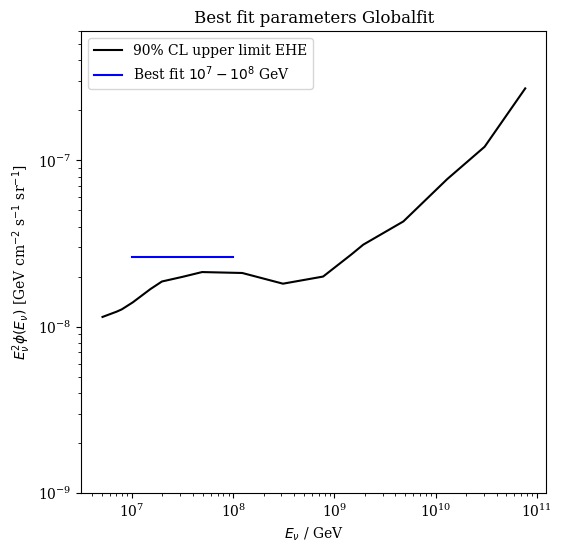

In [28]:
# import EHE differential limits
ehe_csv = pd.read_csv("/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/quasi_diff_ehe_ul.csv")

bestfit_astro_he_norm = bestfits["BPL_10_100PeV"]["astro_he_norm"]

def powerlaw( energy, norm, gamma ):

    return 3*norm*(energy/1e5)**(2-gamma) # 3 for all neutrino flavour flux

log_energies = np.linspace(6.5,10.5,1001)
energies = 10**log_energies

norm_factor = 1e-8

flux_powerlaw = powerlaw( energies, norm = bestfit_astro_he_norm*norm_factor, gamma = 1)

# plotting
fig, (ax) = plt.subplots(1, 1)

# ax.plot( energies, flux_powerlaw, label = r"Best fit $10^7-10^8$ GeV", color = "blue" )
ax.plot( ehe_csv["energy"],  ehe_csv["ul"], label = "90% CL upper limit EHE", color = "black" )

# ax.axvline(10**7.5, color="green", linestyle="--")
ax.plot( [1e7,1e8], [powerlaw(10**7.5,norm = bestfit_astro_he_norm*norm_factor, gamma = 1),powerlaw(10**7.5,norm = bestfit_astro_he_norm*norm_factor, gamma = 1)], label = r"Best fit $10^7-10^8$ GeV", color = "blue" )


ax.set_xlabel(r"$E_{\nu}$ / GeV")
ax.set_ylabel(r"$E_{\nu}^2 \phi(E_\nu)$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")

ax.set_title("Best fit parameters Globalfit")

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_ylim( [ 1e-1,1e3 ])
ax.set_ylim( [ 1e-9,6e-7 ])

ax.legend(ncol = 1)

plt.savefig(f"{plotting_path}/diff_limit_ehe.pdf")
